# Importation de Data Iris

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()
#iris

In [121]:
X=iris.data
y=iris.target
t=iris.target_names

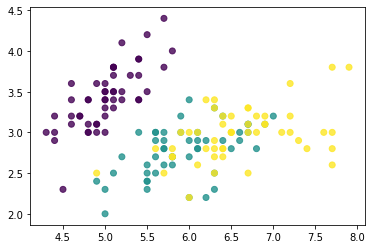

In [122]:
plt.scatter(X[:,0],X[:,1],c=y,alpha=0.8)## c=y: il prend les couleurs par rapport aux 3 classes et alpha c'est la transparence
plt.show()

# Division en Trainset et TestSet

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5) # random_state pour controler l'aleatoire

In [125]:
print('Train Set:', X_train.shape)
print('Test Set:', X_test.shape)

Train Set: (120, 4)
Test Set: (30, 4)


Text(0.5, 1.0, 'Test set')

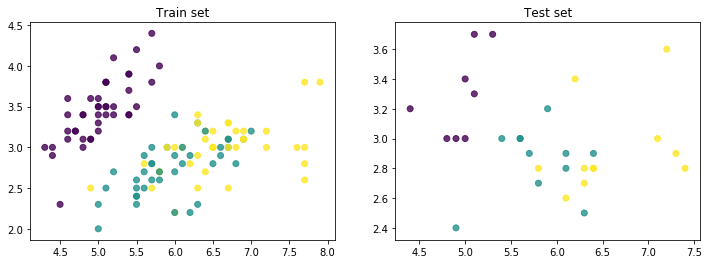

In [126]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,alpha=0.8)
plt.title('Test set')
# plt.show()

# Entrainement et evaluation du modele par:
#### Cross validition
#### Validation curve
#### Gridsearchcv

## K-Nearest Neighbors

In [173]:
from sklearn.neighbors import KNeighborsClassifier

In [174]:
model=KNeighborsClassifier(n_neighbors=1)

In [175]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [176]:
print('Train score', model.score(X_train,y_train))
print('Train test', model.score(X_test,y_test))

Train score 1.0
Train test 0.9


# Entrainement et Amélioration du Modele

# Cross Validation

In [177]:
from sklearn.model_selection import cross_val_score

In [178]:
cross_val_score(KNeighborsClassifier(),X_train,y_train,cv=5,scoring='accuracy') #cv=5 c'est le nombre de splits

array([0.96      , 1.        , 1.        , 0.95833333, 0.95454545])

### Faisons la moyenne de nos scores

In [179]:
cross_val_score(KNeighborsClassifier(),X_train,y_train,cv=5,scoring='accuracy').mean() 

0.9745757575757577

### Dans le cas de K-NN, pour l'hyperparametre de nombre de voisin, on fait une boucle for pour generaliser

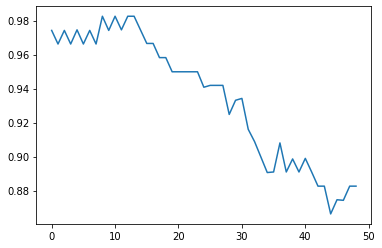

In [180]:
val_score=[] # Score pour validation set
for i in range(1,50):
    score=cross_val_score(KNeighborsClassifier(i),X_train,y_train,cv=5,scoring='accuracy').mean()
    val_score.append(score)
plt.plot(val_score)

## Comments

## Nota:

# Validation curve

In [181]:
from sklearn.model_selection import validation_curve

In [182]:
k=np.arange(1,50)

train_score,val_score= validation_curve(model,X_train,y_train,'n_neighbors',k,cv=5) # n_neighbors c'est notre hyperparametre
# et c'est ses valeurs possibles.


## Termes

In [183]:
val_score.shape

(49, 5)

In [184]:
val_score

array([[1.        , 1.        , 0.95833333, 0.95833333, 0.95454545],
       [0.96      , 1.        , 0.95833333, 0.95833333, 0.95454545],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95454545],
       [0.96      , 1.        , 0.95833333, 0.95833333, 0.95454545],
       [0.96      , 1.        , 1.        , 0.95833333, 0.95454545],
       [0.96      , 1.        , 0.95833333, 0.95833333, 0.95454545],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95454545],
       [1.        , 0.96      , 0.95833333, 0.95833333, 0.95454545],
       [1.        , 1.        , 1.        , 0.95833333, 0.95454545],
       [1.        , 1.        , 0.95833333, 0.95833333, 0.95454545],
       [1.        , 1.        , 1.        , 0.95833333, 0.95454545],
       [0.96      , 1.        , 1.        , 0.95833333, 0.95454545],
       [1.        , 1.        , 1.        , 0.95833333, 0.95454545],
       [1.        , 1.        , 1.        , 0.95833333, 0.95454545],
       [1.        , 0.96      , 1.

### Le score moyen est: On prend la moyenne de chaque ligne (dans numpy axis=1 veut dire ligne contraire à pandas) On obtient seulement tableau de 49 lignes.

In [185]:
val_score.mean(axis=1)

array([0.97424242, 0.96624242, 0.97424242, 0.96624242, 0.97457576,
       0.96624242, 0.97424242, 0.96624242, 0.98257576, 0.97424242,
       0.98257576, 0.97457576, 0.98257576, 0.98257576, 0.97457576,
       0.96657576, 0.96657576, 0.95824242, 0.95824242, 0.94990909,
       0.94990909, 0.94990909, 0.94990909, 0.94990909, 0.94081818,
       0.94190909, 0.94190909, 0.94190909, 0.92481818, 0.93315152,
       0.93424242, 0.91606061, 0.90881818, 0.89972727, 0.89063636,
       0.8909697 , 0.90806061, 0.8909697 , 0.89863636, 0.8909697 ,
       0.8989697 , 0.8909697 , 0.88263636, 0.88263636, 0.86630303,
       0.87463636, 0.87430303, 0.88263636, 0.88263636])

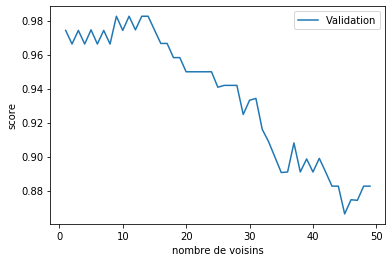

In [186]:
plt.plot(k,val_score.mean(axis=1),label='Validation')
plt.xlabel('nombre de voisins')
plt.ylabel('score')
plt.legend(loc='upper right')

## On peut aussi combiner Train score et val_score

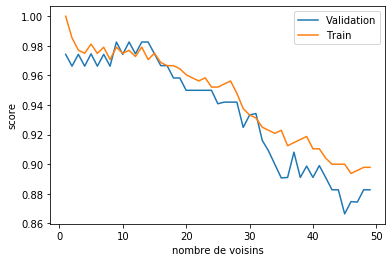

In [187]:
#plt.figure(figsize=(12,4))
plt.plot(k,val_score.mean(axis=1),label='Validation')
plt.plot(k,train_score.mean(axis=1),label='Train')
plt.xlabel('nombre de voisins')
plt.ylabel('score')
plt.legend(loc='upper right')
plt.show()

## Comments

# GRIDSEARCHCV

In [188]:
from sklearn.model_selection import GridSearchCV

In [189]:
param_grid={'n_neighbors':np.arange(1,20),
           'metric':['euclidean','manhattan','minkowski']}

In [190]:
grid=GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)

In [191]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## Le modele qui a obtenu meilleur score

In [192]:
grid.best_score_

0.9833333333333333

## le meilleurs parametres

In [193]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 9}

## Testons notre modele grid_best_estimator dans TestSet

In [194]:
model=grid.best_estimator_

In [196]:
model.score(X_test,y_test)

0.9666666666666667

#### Nota

## Confusion Matrix (Special pour le modele de classification)

In [197]:
from sklearn.metrics import confusion_matrix

In [200]:
confusion_matrix(y_test,model.predict(X_test))

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

## Interpretations

## Coments

# Leraning Curve

In [202]:
from sklearn.model_selection import learning_curve

In [209]:
N,train_score,val_score=learning_curve(model,X_train,y_train,train_sizes=np.linspace(0.1,1,10),cv=5) 
# linspace() contient dans ce cas de %

In [214]:
train_score

array([[0.44444444, 0.55555556, 0.55555556, 0.55555556, 0.55555556],
       [0.84210526, 0.84210526, 0.84210526, 0.84210526, 0.84210526],
       [0.96428571, 0.96428571, 0.92857143, 0.92857143, 0.92857143],
       [0.92105263, 1.        , 1.        , 1.        , 1.        ],
       [0.93617021, 1.        , 1.        , 1.        , 1.        ],
       [0.96491228, 1.        , 1.        , 1.        , 1.        ],
       [0.92424242, 0.96969697, 0.98484848, 1.        , 1.        ],
       [0.94736842, 0.97368421, 0.98684211, 1.        , 1.        ],
       [0.95294118, 0.97647059, 0.97647059, 0.98823529, 0.98823529],
       [0.95789474, 0.97894737, 0.97894737, 0.98947368, 0.98947368]])

In [215]:
val_score

array([[0.32      , 0.36      , 0.33333333, 0.33333333, 0.36363636],
       [0.92      , 0.8       , 0.91666667, 1.        , 0.86363636],
       [0.96      , 0.92      , 0.91666667, 1.        , 0.86363636],
       [0.96      , 0.96      , 1.        , 0.95833333, 0.95454545],
       [0.96      , 0.96      , 1.        , 0.95833333, 0.95454545],
       [1.        , 0.96      , 1.        , 0.95833333, 0.95454545],
       [1.        , 0.96      , 1.        , 0.95833333, 0.95454545],
       [1.        , 1.        , 1.        , 0.95833333, 0.95454545],
       [1.        , 1.        , 1.        , 0.95833333, 0.95454545],
       [1.        , 1.        , 1.        , 0.95833333, 0.95454545]])

In [218]:
N # N veut, le nombre de points (données) que nous donnions à notre model dans chaque etape (de 0 à 9)

array([ 9, 19, 28, 38, 47, 57, 66, 76, 85, 95])

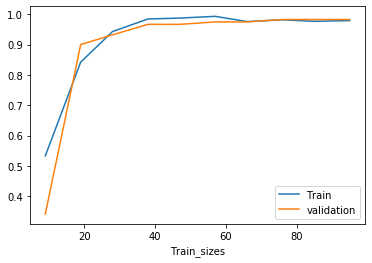

In [219]:
plt.plot(N,train_score.mean(axis=1),label='Train')
plt.plot(N,val_score.mean(axis=1),label='validation')
plt.xlabel('Train_sizes')
plt.legend(loc='lower right')

# FIN